In [1]:
import urllib.request
import numpy as np
from matplotlib.rcsetup import validate_any
from tqdm import tqdm
import re
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/ukairia777/tensorflow-nlp-tutorial/main/12.%20RNN%20Sequence%20Labeling/dataset/train.txt", filename="train.txt")


('train.txt', <http.client.HTTPMessage at 0x14dcbc2b0>)

In [3]:
f = open('train.txt', 'r')
tagged_sentences = []
sentence = []

for line in f:
    if len(line) == 0 or line.startswith('-DOCSTART') or line[0] == '\n':
        if len(sentence) > 0:
            tagged_sentences.append(sentence)
            sentence = []
        continue

    splits = line.split(' ')
    splits[-1] = re.sub('\r', '', splits[-1])
    word = splits[0].lower()
    sentence.append([word, splits[-1]])

In [4]:
print('전체 샘플 개수: ', len(tagged_sentences))

전체 샘플 개수:  14041


In [5]:
sentences, ner_tags = [], []
for tagged_sentences in tagged_sentences: # 14,041 개의 문장 샘플을 1개씩 불러온다.
    sentence, tag_info = zip(*tagged_sentences) # 각 샘흘에서 단어들은 sentene에 개체명 태깅 정보들은 tag_info에 저장.
    sentences.append(list(sentence)) # 각 샘플에서 단어 정보만 저장
    ner_tags.append(list(tag_info)) # 각 샘플에서 개체명 태깅 정보만 저장

In [6]:
print(sentences[0])
print(ner_tags[0])

['eu', 'rejects', 'german', 'call', 'to', 'boycott', 'british', 'lamb', '.']
['B-ORG\n', 'O\n', 'B-MISC\n', 'O\n', 'O\n', 'O\n', 'B-MISC\n', 'O\n', 'O\n']


In [7]:
print(sentences[12])
print(ner_tags[12])

['only', 'france', 'and', 'britain', 'backed', 'fischler', "'s", 'proposal', '.']
['O\n', 'B-LOC\n', 'O\n', 'B-LOC\n', 'O\n', 'B-PER\n', 'O\n', 'O\n', 'O\n']


In [8]:
X_train, X_test, y_train, y_test = train_test_split(sentences, ner_tags, test_size = .2, random_state = 777)

In [9]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = .2, random_state = 777)

In [10]:
print('훈련 데이터의 개수 :', len(X_train))
print('검증 데이터의 개수 :', len(X_valid))
print('테스트 데이터의 개수 :', len(X_test))
print('훈련 데이터 레이블의 개수 :', len(X_train))
print('검증 데이터 레이블의 개수 :', len(X_valid))
print('테스트 데이터 레이블의 개수 :', len(X_test))

훈련 데이터의 개수 : 8985
검증 데이터의 개수 : 2247
테스트 데이터의 개수 : 2809
훈련 데이터 레이블의 개수 : 8985
검증 데이터 레이블의 개수 : 2247
테스트 데이터 레이블의 개수 : 2809


In [11]:
for sent in X_train[:2]:
    print(sent)

['young', 'boys', '9', '1', '0', '8', '6', '19', '3']
['hentgen', '(', '17-7', ')', 'surrendered', 'just', 'three', 'doubles', 'and', 'a', 'pair', 'of', 'singles', 'in', 'tossing', 'his', 'major-league', 'leading', 'ninth', 'complete', 'game', '.']


In [12]:
word_list = []
for sent in X_train:
    for word in sent:
        word_list.append(word)

word_counts = Counter(word_list)
print('총 단어 수 :', len(word_counts))

총 단어 수 : 16742


In [13]:
print('훈련 데이터에서의 단어 the의 등장 횟수 :', word_counts['the'])
print('훈련 데이터에서의 단어 love의 등장 횟수 : ', word_counts['love'])

훈련 데이터에서의 단어 the의 등장 횟수 : 5410
훈련 데이터에서의 단어 love의 등장 횟수 :  7


In [14]:
vocab = sorted(word_counts, key = word_counts.get, reverse = True)
print('등장 빈도수 상위 10개 단어')
print(vocab[:10])

등장 빈도수 상위 10개 단어
['the', ',', '.', 'of', 'in', 'to', 'a', ')', '(', 'and']


In [15]:
word_to_index = {}
word_to_index['<PAD>'] = 0
word_to_index['<UNK>'] = 1

for index, word in enumerate(vocab):
    word_to_index[word] = index + 2

vocab_size = len(word_to_index)
print('패딩 토큰과 UNK 토큰을 고려한 단어 집합의 크기 :', vocab_size)

패딩 토큰과 UNK 토큰을 고려한 단어 집합의 크기 : 16744


In [16]:
def texts_to_sequences(tokenized_X_data, word_to_index):
  encoded_X_data = []
  for sent in tokenized_X_data:
    index_sequences = []
    for word in sent:
      try:
          index_sequences.append(word_to_index[word])
      except KeyError:
          index_sequences.append(word_to_index['<UNK>'])
    encoded_X_data.append(index_sequences)
  return encoded_X_data

In [17]:
encoded_X_train = texts_to_sequences(X_train, word_to_index)
encoded_X_valid = texts_to_sequences(X_valid, word_to_index)
encoded_X_test = texts_to_sequences(X_test, word_to_index)

In [18]:
for sent in encoded_X_train[:2]:
  print(sent)

[1260, 3215, 117, 17, 21, 123, 56, 539, 23]
[5456, 10, 8229, 9, 8230, 186, 84, 1815, 11, 8, 1073, 5, 421, 6, 8231, 35, 2043, 291, 790, 957, 267, 4]


In [19]:
index_to_word = {}
for key, value in word_to_index.items():
    index_to_word[value] = key

In [20]:
decoded_sample = [index_to_word[word] for word in encoded_X_train[0]]
print('기존의 첫번째 샘플 :', X_train[0])
print('복원된 첫번째 샘플 :', decoded_sample)

기존의 첫번째 샘플 : ['young', 'boys', '9', '1', '0', '8', '6', '19', '3']
복원된 첫번째 샘플 : ['young', 'boys', '9', '1', '0', '8', '6', '19', '3']


In [21]:
# y_train으로부터 존재하는 모든 태그들의 집합 구하기
flatten_tags = [tag for sent in y_train for tag in sent]
tag_vocab = list(set(flatten_tags))
print('태그 집합 :', tag_vocab)
print('태그 집합의 크기 :', len(tag_vocab))

태그 집합 : ['I-ORG\n', 'B-PER\n', 'B-LOC\n', 'I-PER\n', 'B-MISC\n', 'O\n', 'I-LOC\n', 'B-ORG\n', 'I-MISC\n']
태그 집합의 크기 : 9


In [22]:
tag_to_index = {}
tag_to_index[''] = 0

for index, word in enumerate(tag_vocab) :
  tag_to_index[word] = index + 1

tag_vocab_size = len(tag_to_index)
# print('패딩 토큰까지 포함된 태그 집합의 크기 :', tag_vocab_size)
print('태그 집합 :', tag_to_index)


태그 집합 : {'': 0, 'I-ORG\n': 1, 'B-PER\n': 2, 'B-LOC\n': 3, 'I-PER\n': 4, 'B-MISC\n': 5, 'O\n': 6, 'I-LOC\n': 7, 'B-ORG\n': 8, 'I-MISC\n': 9}


In [23]:
def encoding_label(sequence, tag_to_index):
  label_sequence = []
  for seq in sequence:
    label_sequence.append([tag_to_index[tag] for tag in seq])
  return label_sequence

In [24]:
encoded_y_train = encoding_label(y_train, tag_to_index)
encoded_y_valid = encoding_label(y_valid, tag_to_index)
encoded_y_test = encoding_label(y_test, tag_to_index)

In [25]:
print('X 데이터 상위 2개')
print(encoded_X_train[:2])
print('-' * 50)
print('y 데이터 상위 2개')
print(encoded_y_train[:2])
print('-' * 50)
print('첫번째 샘플과 레이블의 길이')
print(len(encoded_X_train[0]))
print(len(encoded_y_train[0]))

X 데이터 상위 2개
[[1260, 3215, 117, 17, 21, 123, 56, 539, 23], [5456, 10, 8229, 9, 8230, 186, 84, 1815, 11, 8, 1073, 5, 421, 6, 8231, 35, 2043, 291, 790, 957, 267, 4]]
--------------------------------------------------
y 데이터 상위 2개
[[8, 1, 6, 6, 6, 6, 6, 6, 6], [2, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6]]
--------------------------------------------------
첫번째 샘플과 레이블의 길이
9
9


In [26]:
idx = 7
print('원문:', X_train[idx])
print('기존 레이블:', y_train[idx])
print('-' * 10)
print('정수 인코딩 후:', encoded_X_train[idx])
print('레이블 정수 인코딩 후:', encoded_y_train[idx])

원문: ['new', 'york', '5,710.53', '-', '22.94', '5,778.00', '5,032.94']
기존 레이블: ['B-LOC\n', 'I-LOC\n', 'O\n', 'O\n', 'O\n', 'O\n', 'O\n']
----------
정수 인코딩 후: [45, 107, 8235, 18, 8236, 5459, 8237]
레이블 정수 인코딩 후: [3, 7, 6, 6, 6, 6, 6]


In [27]:
lengths = [len(s) for s in encoded_X_train if hasattr(s, '__len__')]

샘플의 최대 길이 : 78
샘플의 평균 길이 : 14.518420


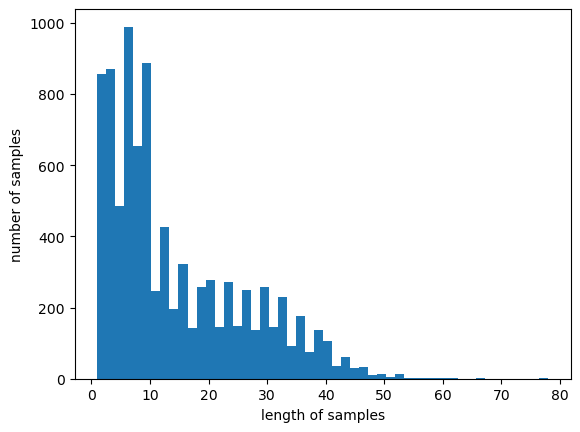

In [28]:
print('샘플의 최대 길이 : %d' % max(len(l) for l in encoded_X_train))
print('샘플의 평균 길이 : %f' % (sum(map(len, encoded_X_train))/len(encoded_X_train)))
plt.hist([len(s) for s in encoded_X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [29]:
def below_threshold_len(max_len, nested_list):
    count = 0
    for sentence in nested_list:
        if len(sentence) > max_len:
            count += 1
    print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s' %(max_len, (count / len(nested_list)) * 100))

In [33]:
max_len = 80
below_threshold_len(max_len, encoded_X_train)

전체 샘플 중 길이가 80 이하인 샘플의 비율: 0.0


In [34]:
def pad_sequences(sentences, max_len):
    features = np.zeros((len(sentences), max_len), dtype = int)
    for index, sentence in enumerate(sentences):
        if len(sentence) != 0:
            features[index, :len(sentence)] = np.array(sentence)[:max_len]
    return features

In [35]:
padded_X_train = pad_sequences(encoded_X_train, max_len=max_len)
padded_X_valid = pad_sequences(encoded_X_valid, max_len=max_len)
padded_X_test = pad_sequences(encoded_X_test, max_len=max_len)

padded_y_train = pad_sequences(encoded_y_train, max_len=max_len)
padded_y_valid = pad_sequences(encoded_y_valid, max_len=max_len)
padded_y_test = pad_sequences(encoded_y_test, max_len=max_len)

In [36]:
print('훈련 데이터의 크기 :', padded_X_train.shape)
print('검증 데이터의 크기 :', padded_X_valid.shape)
print('테스트 데이터의 크기 :', padded_X_test.shape)
print('-' * 30)
print('훈련 데이터의 레이블 :', padded_y_train.shape)
print('검증 데이터의 레이블 :', padded_y_valid.shape)
print('테스트 데이터의 레이블 :', padded_y_test.shape)

훈련 데이터의 크기 : (8985, 80)
검증 데이터의 크기 : (2247, 80)
테스트 데이터의 크기 : (2809, 80)
------------------------------
훈련 데이터의 레이블 : (8985, 80)
검증 데이터의 레이블 : (2247, 80)
테스트 데이터의 레이블 : (2809, 80)


In [37]:
print('훈련 데이터의 상위 샘플 2개')
print(padded_X_train[:2])
print('-' * 5 + '레이블' + '-' * 5)
print(padded_y_train[:2])

훈련 데이터의 상위 샘플 2개
[[1260 3215  117   17   21  123   56  539   23    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0]
 [5456   10 8229    9 8230  186   84 1815   11    8 1073    5  421    6
  8231   35 2043  291  790  957  267    4    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0]]
-----레이블-----
[[8 1 6 6 6 6 6 6 6 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

In [38]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

In [39]:
USE_MPS = torch.backends.mps.is_available()
device = torch.device('mps' if USE_MPS else 'cpu')

In [40]:
class NETTagger(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim):
        super(NETTagger, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.gru = nn.GRU(embedding_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        embedded = self.embedding(x)
        gru_out, _ = self.gru(embedded)
        logits = self.fc(gru_out)
        return logits


In [46]:
class NETTaggerBidirectional(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim, num_layers=2):
        super(NETTaggerBidirectional, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, num_layers=num_layers, batch_first=True, bidirectional=True)
        self.fc = nn.Linear(hidden_dim*2, output_dim)

    def forward(self, x):
        # x: (batch_size, seq_length)
        embedded = self.embedding(x)  # (batch_size, seq_length, embedding_dim)
        lstm_out, _ = self.lstm(embedded)  # (batch_size, seq_length, hidden_dim*2)
        logits = self.fc(lstm_out)  # (batch_size, seq_length, output_dim)
        return logits

In [47]:
X_train_tensor = torch.tensor(padded_X_train, dtype=torch.long)
y_train_tensor = torch.tensor(padded_y_train, dtype=torch.long)
X_valid_tensor = torch.tensor(padded_X_valid, dtype=torch.long)
y_valid_tensor = torch.tensor(padded_y_valid, dtype=torch.long)
X_test_tensor = torch.tensor(padded_X_test, dtype=torch.long)
y_test_tensor = torch.tensor(padded_y_test, dtype=torch.long)

train_dataset = torch.utils.data.TensorDataset(X_train_tensor, y_train_tensor)
train_dataloader = torch.utils.data.DataLoader(train_dataset, shuffle=True, batch_size=32)
valid_dataset = torch.utils.data.TensorDataset(X_valid_tensor, y_valid_tensor)
valid_dataloader = torch.utils.data.DataLoader(valid_dataset, shuffle=False, batch_size=32)
test_dataset = torch.utils.data.TensorDataset(X_test_tensor, y_test_tensor)
test_dataloader = torch.utils.data.DataLoader(test_dataset, shuffle=False, batch_size=32)

In [48]:
print(vocab_size)

16744


In [49]:
embedding_dim = 100
hidden_dim = 256
output_dim = tag_vocab_size
learning_rate = 0.01
num_epochs = 10
num_layers = 2

In [50]:
model = NETTaggerBidirectional(vocab_size, embedding_dim, hidden_dim, output_dim, num_layers)
model.to(device)

NETTaggerBidirectional(
  (embedding): Embedding(16744, 100)
  (lstm): LSTM(100, 256, num_layers=2, batch_first=True, bidirectional=True)
  (fc): Linear(in_features=512, out_features=10, bias=True)
)

In [51]:
criterion = nn.CrossEntropyLoss(ignore_index = 0)
optimizer = optim.Adam(model.parameters(), lr = learning_rate)

In [52]:
def calculate_accuracy(logits, labels, ignore_index = 0):
    # 예측 레이블 구하기
    predicted = torch.argmax(logits, dim = 1)

    # 패딩 토큰 무시
    mask = (labels != ignore_index)

    # 정답을 맞춘 경우를 집계
    correct = (predicted == labels).masked_select(mask).sum().item()
    total = mask.sum().item()

    accuracy = correct / total
    return accuracy


In [53]:
def evaluate(model, valid_dataloader, criterion, device):
    val_loss = 0
    val_correct = 0
    val_total = 0

    model.eval()
    with torch.no_grad():
        for batch_X, batch_y in valid_dataloader:
            batch_X, batch_y = batch_X.to(device), batch_y.to(device)

            # Forward pass
            logits = model(batch_X)

            # Compute loss
            loss = criterion(logits.view(-1, output_dim), batch_y.view(-1))

            # Calculate validation accuracy and loss
            val_loss += loss.item()
            val_correct += calculate_accuracy(logits.view(-1, output_dim), batch_y.view(-1)) * batch_y.size(0)
            val_total += batch_y.size(0)
    val_accuracy = val_correct / val_total
    val_loss /= len(valid_dataloader)

    return val_loss, val_accuracy

In [54]:
best_val_loss = float('inf')

for epoch in range(num_epochs):
    train_loss, train_correct, train_total = 0, 0, 0
    model.train()

    for batch_X, batch_y in train_dataloader:
        batch_X, batch_y = batch_X.to(device), batch_y.to(device)
        logits = model(batch_X)

        loss = criterion(logits.view(-1, output_dim), batch_y.view(-1))

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        train_correct += calculate_accuracy(logits.view(-1, output_dim), batch_y.view(-1)) * batch_y.size(0)
        train_total += batch_y.size(0)

    train_accuracy = train_correct / train_total
    train_loss /= len(train_dataloader)

    val_loss, val_accuracy = evaluate(model, valid_dataloader, criterion, device)

    print(f'Epoch {epoch + 1}/{num_epochs}:')
    print(f'Train loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}')
    print(f'Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}')

    if val_loss < best_val_loss:
        print(f'Validation loss improved from {best_val_loss:.4f} to {val_loss:.4f}. Saving model...')
        best_val_loss = val_loss
        torch.save(model.state_dict(), 'best_model_bilstm.pth')

Epoch 1/10:
Train loss: 0.4123, Train Accuracy: 0.8863
Validation Loss: 0.2101, Validation Accuracy: 0.9402
Validation loss improved from inf to 0.2101. Saving model...
Epoch 2/10:
Train loss: 0.1268, Train Accuracy: 0.9629
Validation Loss: 0.1680, Validation Accuracy: 0.9565
Validation loss improved from 0.2101 to 0.1680. Saving model...
Epoch 3/10:
Train loss: 0.0541, Train Accuracy: 0.9838
Validation Loss: 0.1689, Validation Accuracy: 0.9592
Epoch 4/10:
Train loss: 0.0323, Train Accuracy: 0.9899
Validation Loss: 0.1856, Validation Accuracy: 0.9588
Epoch 5/10:
Train loss: 0.0206, Train Accuracy: 0.9937
Validation Loss: 0.1955, Validation Accuracy: 0.9584
Epoch 6/10:
Train loss: 0.0178, Train Accuracy: 0.9942
Validation Loss: 0.2351, Validation Accuracy: 0.9589
Epoch 7/10:
Train loss: 0.0214, Train Accuracy: 0.9931
Validation Loss: 0.2035, Validation Accuracy: 0.9556
Epoch 8/10:
Train loss: 0.0210, Train Accuracy: 0.9935
Validation Loss: 0.1929, Validation Accuracy: 0.9577
Epoch 9/10:

In [55]:
model.load_state_dict(torch.load('best_model_bilstm.pth'))

model.to(device)

val_loss, val_accuracy = evaluate(model, valid_dataloader, criterion, device)

print(f'Best model validation loss: {val_loss:.4f}')
print(f'Best model validation accuracy: {val_accuracy:.4f}')

/var/folders/py/xgf_87rd5nz9rsbc143wp9qc0000gn/T/ipykernel_5372/2780873639.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('best_model_b

Best model validation loss: 0.1680
Best model validation accuracy: 0.9565


In [56]:
test_loss, test_accuracy = evaluate(model, test_dataloader, criterion, device)
print(f'Best model test loss: {test_loss:.4f}')
print(f'Best model test accuracy: {test_accuracy:.4f}')

Best model test loss: 0.1605
Best model test accuracy: 0.9577


In [57]:
index_to_tag = {}
for key, value in tag_to_index.items():
    index_to_tag[value] = key

In [58]:
def predict_labels(text, model, word_to_ix, index_to_tag, max_len=150):
    # 단어 토큰화
    tokens = text.split()

    # 정수 인코딩
    token_indices = [word_to_ix.get(token, 1) for token in tokens]

    # 패딩
    token_indices_padded = np.zeros(max_len, dtype=int)
    token_indices_padded[:len(token_indices)] = token_indices[:max_len]

    # 텐서로 변환
    input_tensor = torch.tensor(token_indices_padded, dtype=torch.long).unsqueeze(0).to(device)

    # 모델의 입력으로 사용하고 예측값 리턴
    model.eval()
    with torch.no_grad():
        logits = model(input_tensor)

    # 가장 값이 높은 인덱스를 예측값으로 선택
    predicted_indices = torch.argmax(logits, dim=-1).squeeze(0).tolist()

    # 패딩 토큰 제거
    predicted_indices_no_pad = predicted_indices[:len(tokens)]

    # 패딩 토큰을 제외하고 정수 시퀀스를 예측 시퀀스로 변환
    predicted_tags = [index_to_tag[index] for index in predicted_indices_no_pad]

    return predicted_tags

In [59]:
print(X_test[0])

['feyenoord', 'rotterdam', 'suffered', 'an', 'early', 'shock', 'when', 'they', 'went', '1-0', 'down', 'after', 'four', 'minutes', 'against', 'de', 'graafschap', 'doetinchem', '.']


In [60]:
sample = ' '.join(X_test[0])
print(sample)

feyenoord rotterdam suffered an early shock when they went 1-0 down after four minutes against de graafschap doetinchem .


In [61]:
predicted_tags = predict_labels(sample, model, word_to_index, index_to_tag)
print('예측 :', predicted_tags)
print('실제값 :', y_test[0])

예측 : ['B-ORG\n', 'I-ORG\n', 'O\n', 'O\n', 'O\n', 'O\n', 'O\n', 'O\n', 'O\n', 'O\n', 'O\n', 'O\n', 'O\n', 'O\n', 'O\n', 'O\n', 'I-ORG\n', 'I-PER\n', 'O\n']
실제값 : ['B-ORG\n', 'I-ORG\n', 'O\n', 'O\n', 'O\n', 'O\n', 'O\n', 'O\n', 'O\n', 'O\n', 'O\n', 'O\n', 'O\n', 'O\n', 'O\n', 'O\n', 'B-ORG\n', 'I-ORG\n', 'O\n']
